# Algoritmos de Busca 

### Importando Bibliotecas

In [1]:
import time 
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Busca sequêncial 

Percorre a estrutura de dados inteira item por item, podendo a estrutura ser uma lista encadeada, um vetor ou qualquer tabela organizada
    
A lógica tem como base a comparação entre a chave primária que se busca e a presente no indíce da estrutura. Pro exemplo é buscada a chave 48 em um vetor, a busca começa no primeiro item do vetor, comparando a chave do item e a buscada, caso não sejam iguais é passado para o próximo item do vetor e feita a comparação e assim por diante até achar uma chave igual a procurada e o índice onde a chave está guardada é retornado. Quando a chave procurada não existe na estrutura onde está sendo procurada deve-se retornar alguma mensagem de erro ou um valor padrão para essa situação.
    
* Complexidade: O(n)
* Número média de comparações: (n + 1) / 2

#### Algoritmo Busca Sequencial com while

In [2]:
def seq_search_while(vector, item) -> (bool, int):
    index = 0
    found = False
    
    while index < len(vector) and not found:
        if vector[index] == item:
            found = True
        else:
            index += 1
        
    return found, index

#### Algoritmo Busca Sequencial com for

In [3]:
def seq_search_for(vector, item) -> (bool, int):
    found = False
    
    for index in range(0, len(vector)):
        if vector[index] == item:
            found = True
            return found, index
    
    if found == False:
        return found, "Not found in the range"  

##  Busca Binária

Usada em estruturas de dados ondem os dados estejam ordenados. Por exemplo, se as chaves primárias estiverem organizadas de forma sequencial em um vetor, podemos achar uma chave de forma mais eficiente com a busca binária do que com a sequencial, pois não é necessário passar por todos os dados do vetor. A lógica da busca binária é usar da ordem da estrutura para poder diminuir o número de comparações feitas até achar o valor procurado ou descartar sua existência na estrutura. Isso é feito da seguinte forma:
    
1. Acha-se o valor intermediario da estrutura ( mediana )
2. Compara-se o valor procurado com a mediana
    * Se o valor procurado é igual a mediana retorna a mediana
    * Caso o valor procurado seja menor que a mediana atualiza-se o valor maximo (fim) da estrutura para mediana - 1 e os passos 1 e 2 são executados de novo
    * Caso o valor procurado seja maior que a mediana atualiza-se o valor mínimo (início) da estrutura para mediana + 1 e os passos 1 e 2 são executador de novo
        
Perceba que o algorítimo é recursivo por natureza, ao chegar nos condicionais do passo 2, atualiza-se o que é necessário e o passos 1 e 2 são reexecutados 
    
* Complexidade: O(log n)
    
### Vantagens:
  * Eficiência de busca
  * Implementação simples
    
### Desvantagens:
  * Necessidade que os índices da estrútura estejam organizados de forma ordenada

#### Algoritmo Busca Binária Recursiva

In [4]:
def bin_search(vector, item, begin, end) -> (bool, int):
    found = False
    mid = begin + (end - begin) // 2
    
    if item <= vector[end] and item >= vector[begin]:
        if vector[mid] == item:
            found = True
            return found, mid
    
        elif item > vector[mid]:
            return bin_search(vector, item, mid+1, end)
    
        else:
            return bin_search(vector, item, begin, mid-1)
    else:
        return found, "Item not in the range of the struct"

## Busca por Interpolação

 Usada em conjuntos de dados os quais os dados são distribuidos de forma uniforme, onde esse dados são contínuos portanto a densidade de dados é contínua. Como os dados estão distribuidos de forma uniforme é mais fácil fazer uma estimativa de onde se encontra o índice procurado está portanto assim como a busca binária ela tambem é mais efetiva que a sequêncial, sendo mais efetiva até que a binária por conta da densidade contínua dos dados.
A estimativa da posição de um item é dada por:
        
    meio = inicio + ( fim - inicio ) * ( (item - vector[inicio]) / (vector[fim] - vector[inicio]) )
                
Caso o item procurado nao seja o encontrado os indices de inicio e fim serão atualizados assim como na busca binária, portanto podemos ver que o algoritmo de busca interpolada tambem é recursivo.
    
* Complexidade: O(log(log(n))
    
### Vantagens:
        
* Alta taxa de acerto em duas ou menos iterações
        
### Desvantagens:
    
* Se os dados estão distribuidos de forma uniforme a taxa de acerto cai drasticamente chegando ao nível de de eficiencia de um algoritmo de busca sequêncial 

#### Algoritmo Busca Interpolada

In [5]:
def inter_search(lys, val):  
    low = 0
    high = (len(lys) - 1)
    while low <= high and val >= lys[low] and val <= lys[high]:
        index = low + int(((float(high - low) / ( lys[high] - lys[low])) * ( val - lys[low])))
        if lys[index] == val:
            return index
        if lys[index] < val:
            low = index + 1;
        else:
            high = index - 1;
    return -1

## Comparando algorítmos de busca

Para fazer a comparação entre os algorítmos de busca, iremos declarar vetores de tamanhos diferentes e usaremos os 4 algorítmos para acharmos uma mesma chave, o tempo de execução será averiguado e comparado.

### Declaração dos vetores

In [6]:
# TAMANHO VETORES 20K - 1M

vector1 = list(range(0,20000))
vector2 = list(range(0,40000))
vector3 = list(range(0,60000))
vector4 = list(range(0,80000))
vector5 = list(range(0,100000))
vector6 = list(range(0,110000))

#### Chamando Busca Squencial com while

In [7]:
#VETOR 20K
start1_seq_while = time.time()
seq_search_while(vector1,7415)
end1_seq_while = time.time()

#VETOR 40K
start2_seq_while = time.time()
seq_search_while(vector2,10965)
end2_seq_while = time.time()

#VETOR 60K
start3_seq_while = time.time()
seq_search_while(vector3,51036)
end3_seq_while = time.time()

#VETOR 80K
start4_seq_while = time.time()
seq_search_while(vector4, 56274)
end4_seq_while = time.time()

#VETOR 100K
start5_seq_while = time.time()
seq_search_while(vector5, 76249)
end5_seq_while = time.time()

#VETOR 110K
start6_seq_while = time.time()
seq_search_while(vector6,63669)
end6_seq_while = time.time()

#### Organizando os tempos em um vetor e gerando gráfico

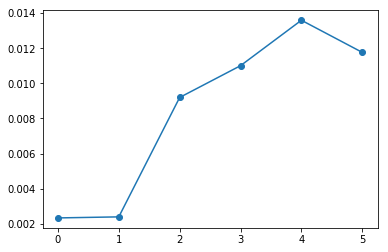

In [8]:
o1 = end1_seq_while - start1_seq_while
o2 = end2_seq_while - start2_seq_while
o3 = end3_seq_while - start3_seq_while
o4 = end4_seq_while - start4_seq_while
o5 = end5_seq_while - start5_seq_while
o6 = end6_seq_while - start6_seq_while

seq_while = [o1,o2,o3,o4,o5,o6]

plt.plot(seq_while, linestyle='-', marker='o')

#### Chamando Busca Sequencial com For

In [9]:
#VETOR 20K
start1_seq_for = time.time()
seq_search_for(vector1,7415)
end1_seq_for = time.time()

#VETOR 40K
start2_seq_for = time.time()
seq_search_for(vector2,10965)
end2_seq_for = time.time()

#VETOR 60K
start3_seq_for = time.time()
seq_search_for(vector3,51036)
end3_seq_for = time.time()

#VETOR 80K
start4_seq_for = time.time()
seq_search_for(vector4, 56274)
end4_seq_for = time.time()

#VETOR 100K
start5_seq_for = time.time()
seq_search_for(vector5, 76249)
end5_seq_for = time.time()

#VETOR 1M
start6_seq_for = time.time()
seq_search_for(vector6,63669)
end6_seq_for = time.time()

#### Organizando os tempos em um vetor e gerando gráfico

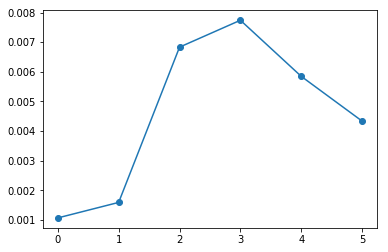

In [10]:
l1 = end1_seq_for - start1_seq_for
l2 = end2_seq_for - start2_seq_for
l3 = end3_seq_for - start3_seq_for
l4 = end4_seq_for - start4_seq_for
l5 = end5_seq_for - start5_seq_for
l6 = end6_seq_for - start6_seq_for

seq_for = [l1,l2,l3,l4,l5,l6]

plt.plot(seq_for, linestyle='-', marker='o')

#### Chamando Busca Binária 

In [11]:
#VETOR 20K
start1_bin = time.time()
bin_search(vector1,7415, 0, 20000-1)
end1_bin = time.time()

#VETOR 40K
start2_bin = time.time()
bin_search(vector2,10965, 0, 40000-1)
end2_bin = time.time()

#VETOR 60K
start3_bin = time.time()
bin_search(vector3,51036, 0, 60000-1)
end3_bin = time.time()

#VETOR 80K
start4_bin = time.time()
bin_search(vector4, 56274, 0, 80000-1)
end4_bin = time.time()

#VETOR 100K
start5_bin = time.time()
bin_search(vector5, 76249, 0, 100000-1)
end5_bin = time.time()

#VETOR 110K
start6_bin = time.time()
bin_search(vector6,63669, 0, 110000-1)
end6_bin = time.time()

#### Organizando os tempos em um vetor e gerando gráfico

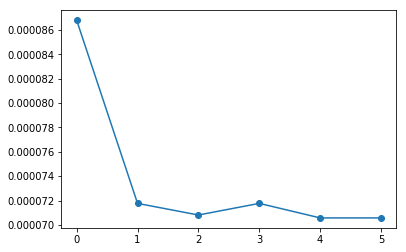

In [12]:
m1 = end1_bin - start1_bin
m2 = end2_bin - start2_bin
m3 = end3_bin - start3_bin
m4 = end4_bin - start4_bin
m5 = end5_bin - start5_bin
m6 = end6_bin - start6_bin

bin_vector = [m1,m2,m3,m4,m5,m6]

plt.plot(bin_vector, linestyle='-', marker='o')

#### Chamando Busca Interpolada

In [13]:
#VETOR 20K
start1_inter = time.time()
inter_search(vector1,7415)
end1_inter = time.time()

#VETOR 40K
start2_inter = time.time()
inter_search(vector2,10965)
end2_inter = time.time()

#VETOR 60K
start3_inter = time.time()
inter_search(vector3,51036)
end3_inter = time.time()

#VETOR 80K
start4_inter = time.time()
inter_search(vector4, 56274)
end4_inter = time.time()

#VETOR 100K
start5_inter = time.time()
inter_search(vector5, 76249)
end5_inter = time.time()

#VETOR 110K
start6_inter = time.time()
inter_search(vector6,63669)
end6_inter = time.time()

#### Organizando os tempos em um vetor e gerando gráfico

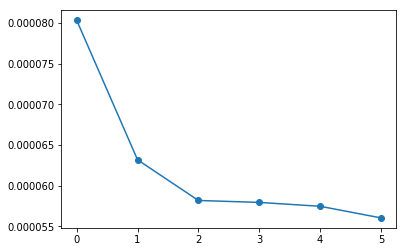

In [14]:
k1 = end1_inter - start1_inter
k2 = end2_inter - start2_inter
k3 = end3_inter - start3_inter
k4 = end4_inter - start4_inter
k5 = end5_inter - start5_inter
k6 = end6_inter - start6_inter

inter_vector = [k1,k2,k3,k4,k5,k6]

plt.plot(inter_vector, linestyle='-', marker='o')

### Funções para achar porcentagem

In [15]:
def faster(vec1, vec2):
    output = []
    for i in range(0, len(vec1)):
        a = vec2[i] / vec1[i]
        output.append(a)
    
    return output

In [16]:
def transform_to_porcent(vector):
    output = []
    for i in range(0, len(vector)):
        a = 1 - vector[i]
        output.append(a)
        
    return output

### Chamando funções de procentagem

In [17]:
comp1 = faster(seq_while, seq_for)
comp2 = faster(bin_vector, inter_vector)
comp3 = faster(seq_for, bin_vector)

rapidez1 = transform_to_porcent(comp1)
rapidez2 = transform_to_porcent(comp2)
rapidez3 = transform_to_porcent(comp3)

### Tabela geral dos tempos

In [18]:
table = {'Sequencial - while':seq_while, 'Sequencial - For': seq_for, 'Busca Binária':bin_vector, 
     'Busca Interpolada':inter_vector}
table = pd.DataFrame(table)
table

,Sequencial - while,Sequencial - For,Busca Binária,Busca Interpolada
0,0.002334,0.001063,0.000087,0.000080
1,0.002393,0.001586,0.000072,0.000063
2,0.009193,0.006831,0.000071,0.000058
3,0.011003,0.007740,0.000072,0.000058
4,0.013591,0.005843,0.000071,0.000057
5,0.011760,0.004332,0.000071,0.000056


### Comparação entre as duas buscas sequênciais 

In [19]:
seq = {'Sequencial - while':seq_while, 'Sequencial - For': seq_for, "% + rápido": rapidez1}
seq = pd.DataFrame(seq)
seq

,Sequencial - while,Sequencial - For,% + rápido
0,0.002334,0.001063,0.544647
1,0.002393,0.001586,0.337053
2,0.009193,0.006831,0.256924
3,0.011003,0.007740,0.296570
4,0.013591,0.005843,0.570040
5,0.011760,0.004332,0.631668


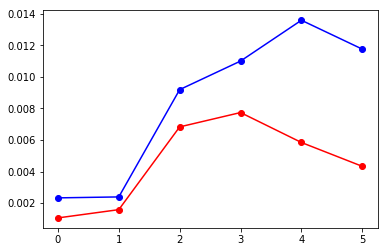

In [20]:
plt.plot(seq_while, linestyle='-', marker='o', color='blue')
plt.plot(seq_for, linestyle='-', marker='o',color='red')

### Comparando busca binária e interpolada

In [21]:
g = {'Busca Binária':bin_vector, 'Busca Interpolada':inter_vector, '% + rapida':rapidez2}
g = pd.DataFrame(g)
g

,Busca Binária,Busca Interpolada,% + rapida
0,0.000087,0.000080,0.074176
1,0.000072,0.000063,0.119601
2,0.000071,0.000058,0.178451
3,0.000072,0.000058,0.192691
4,0.000071,0.000057,0.185811
5,0.000071,0.000056,0.206081


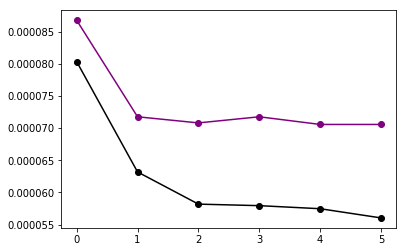

In [23]:
plt.plot(bin_vector, linestyle='-', marker='o', color='purple')
plt.plot(inter_vector, linestyle='-', marker='o',color='black')

### Comparando Busca Binária e Sequencial -For

In [22]:
comp = {'Sequencial - For': seq_for, 'Busca Binária':bin_vector, '% + rapida':rapidez3}
comp = pd.DataFrame(comp)
comp

,Sequencial - For,Busca Binária,% + rapida
0,0.001063,0.000087,0.918331
1,0.001586,0.000072,0.954764
2,0.006831,0.000071,0.989635
3,0.007740,0.000072,0.990728
4,0.005843,0.000071,0.987923
5,0.004332,0.000071,0.983708


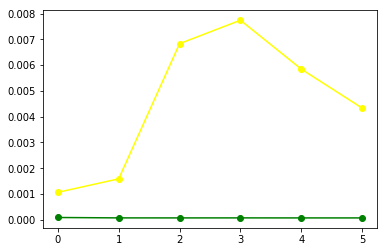

In [24]:
plt.plot(seq_for, linestyle='-', marker='o', color='yellow')
plt.plot(bin_vector, linestyle='-', marker='o',color='green')